# Download Fashion MNIST

In [0]:
!mkdir -p ./data/fashion

In [4]:
!curl -L http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz -o ./data/fashion/train-images-idx3-ubyte.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 25.1M  100 25.1M    0     0  4300k      0  0:00:06  0:00:06 --:--:-- 5533k


In [5]:
!curl -L http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz -o ./data/fashion/train-labels-idx1-ubyte.gz
!curl -L http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz -o ./data/fashion/t10k-images-idx3-ubyte.gz
!curl -L http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz -o ./data/fashion/t10k-labels-idx1-ubyte.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 29515  100 29515    0     0  29515      0  0:00:01 --:--:--  0:00:01 47451
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4318k  100 4318k    0     0   863k      0  0:00:05  0:00:05 --:--:--  951k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5148  100  5148    0     0   5148      0  0:00:01 --:--:--  0:00:01 12902


In [6]:
!mkdir ./utils
!curl https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/utils/mnist_reader.py -o ./utils/mnist_reader.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   756  100   756    0     0    756      0  0:00:01 --:--:--  0:00:01  5040


# Load dataset

In [0]:
from utils import mnist_reader
x_train, y_train = mnist_reader.load_mnist('./data/fashion', kind='train')
x_test, y_test = mnist_reader.load_mnist('./data/fashion', kind='t10k')

# Import packages

In [10]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import tensorflow  as tf
from keras.layers import *

Using TensorFlow backend.


In [0]:
from keras.callbacks import ReduceLROnPlateau

In [7]:
!curl -L https://github.com/shaoanlu/GroupNormalization-keras/raw/master/GroupNormalization.py -o GroupNormalization.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   162  100   162    0     0    162      0  0:00:01 --:--:--  0:00:01   814
100  3048  100  3048    0     0   3048      0  0:00:01 --:--:--  0:00:01  3048


In [0]:
from GroupNormalization import GroupNormalization

# Training setup

In [0]:
# input image dimensions
img_rows, img_cols = 28, 28

num_classes = 10
epochs = 13
w_l2 = 1e-5
batch_size = 1

In [0]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-5)

In [15]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# Experiments

### Setup:
- Optimizer: Adam()
- Batch size: 1
- Epochs: 13

## 1. BatchNorm base line

In [0]:
# input image dimensions
img_rows, img_cols = 28, 28

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(w_l2), input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [17]:
hist0=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), callbacks=[reduce_lr])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/13
 3384/60000 [>.............................] - ETA: 10:22 - loss: 7.5330 - acc: 0.360259998/60000 [============================>.] - ETA: 0s - loss: 0.9615 - acc: 0.777360000/60000 [==============================] - 662s 11ms/step - loss: 0.9614 - acc: 0.7773 - val_loss: 0.8308 - val_acc: 0.7338
Epoch 2/13
 2210/60000 [>.............................] - ETA: 10:20 - loss: 0.4340 - acc: 0.859359995/60000 [============================>.] - ETA: 0s - loss: 0.4463 - acc: 0.851660000/60000 [==============================] - 664s 11ms/step - loss: 0.4463 - acc: 0.8516 - val_loss: 0.8120 - val_acc: 0.7377
Epoch 3/13
 2209/60000 [>.............................] - ETA: 10:18 - loss: 0.4515 - acc: 0.861959997/60000 [============================>.] - ETA: 0s - loss: 0.4457 - acc: 0.854760000/60000 [==============================] - 663s 11ms/step - loss: 0.4457 - acc: 0.8547 - val_loss: 0.7492 - val_acc: 0.7742
Epoch 4/13
 2220/60000 [>.

## 2. GroupNorm

In [0]:
# input image dimensions
img_rows, img_cols = 28, 28

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(w_l2), input_shape=input_shape))
model.add(GroupNormalization(group=8))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(w_l2)))
model.add(GroupNormalization(group=8))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [20]:
hist1=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), callbacks=[reduce_lr])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/13
 2741/60000 [>.............................] - ETA: 12:48 - loss: 11.5287 - acc: 0.269259996/60000 [============================>.] - ETA: 0s - loss: 1.3124 - acc: 0.753860000/60000 [==============================] - 820s 14ms/step - loss: 1.3124 - acc: 0.7538 - val_loss: 0.4563 - val_acc: 0.8433
Epoch 2/13
 1779/60000 [..............................] - ETA: 13:03 - loss: 0.4487 - acc: 0.844359997/60000 [============================>.] - ETA: 0s - loss: 0.4363 - acc: 0.852660000/60000 [==============================] - 831s 14ms/step - loss: 0.4363 - acc: 0.8526 - val_loss: 0.3852 - val_acc: 0.8736
Epoch 3/13
 1789/60000 [..............................] - ETA: 13:01 - loss: 0.4066 - acc: 0.869859997/60000 [============================>.] - ETA: 0s - loss: 0.4135 - acc: 0.863660000/60000 [==============================] - 830s 14ms/step - loss: 0.4135 - acc: 0.8636 - val_loss: 0.3678 - val_acc: 0.8740
Epoch 4/13
 1780/60000 [.

## 3. InstanceNorm

In [0]:
%%capture
!wget https://github.com/shaoanlu/faceswap-GAN/raw/master/instance_normalization.py

In [0]:
from instance_normalization import InstanceNormalization

In [0]:
# input image dimensions
img_rows, img_cols = 28, 28

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(w_l2), input_shape=input_shape))
model.add(InstanceNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(w_l2)))
model.add(InstanceNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [24]:
hist2=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), callbacks=[reduce_lr])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/13
 2828/60000 [>.............................] - ETA: 12:33 - loss: 1.7323 - acc: 0.374859998/60000 [============================>.] - ETA: 0s - loss: 0.5906 - acc: 0.793660000/60000 [==============================] - 806s 13ms/step - loss: 0.5906 - acc: 0.7936 - val_loss: 0.4317 - val_acc: 0.8731
Epoch 2/13
 1849/60000 [..............................] - ETA: 12:34 - loss: 0.3900 - acc: 0.873459996/60000 [============================>.] - ETA: 0s - loss: 0.4184 - acc: 0.863460000/60000 [==============================] - 802s 13ms/step - loss: 0.4183 - acc: 0.8634 - val_loss: 0.3696 - val_acc: 0.8789
Epoch 3/13
 1856/60000 [..............................] - ETA: 12:34 - loss: 0.3693 - acc: 0.880459996/60000 [============================>.] - ETA: 0s - loss: 0.4005 - acc: 0.870460000/60000 [==============================] - 802s 13ms/step - loss: 0.4006 - acc: 0.8704 - val_loss: 0.3911 - val_acc: 0.8872
Epoch 4/13
 1848/60000 [..

## Visualization

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
def plot_history(hists, attribute='val_loss', axis=(-1,14,0.7,0.94), loc='lower right'):
    ylabel = {'oss': 'loss', 'acc': 'accuracy'}
    title = {'val_loss': 'valid. loss', 'loss': 'trn. loss', 'val_acc': 'valid. accuracy', 'acc': 'trn._ accuracy'}
    num_hists = len(hists)
    
    plt.figure(figsize=(8, 5))  
    plt.axis(axis)
    for i in range(num_hists):
        plt.plot(hists[i].history[attribute])
    plt.title(title[attribute])  
    plt.ylabel(ylabel[attribute[-3:]])  
    plt.xlabel('epoch')  
    plt.legend(['BatchNorm', 'GroupNorm', 'InstNorm'], loc=loc)  

    plt.show()

In [0]:
hists = [hist0, hist1, hist2]

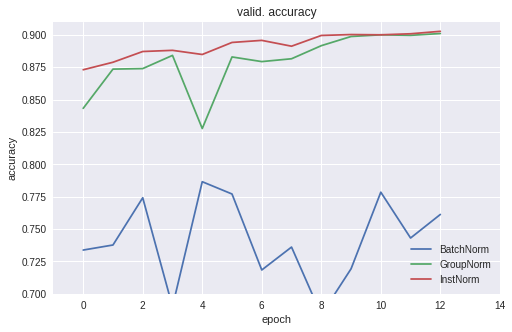

In [28]:
plot_history(hists, attribute='val_acc', axis=(-1,14,0.7,0.91), loc='lower right')

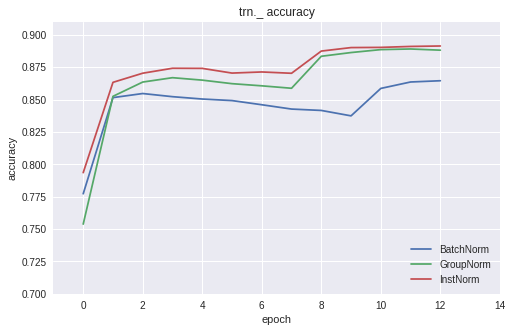

In [29]:
plot_history(hists, attribute='acc', axis=(-1,14,0.7,0.91), loc='lower right')

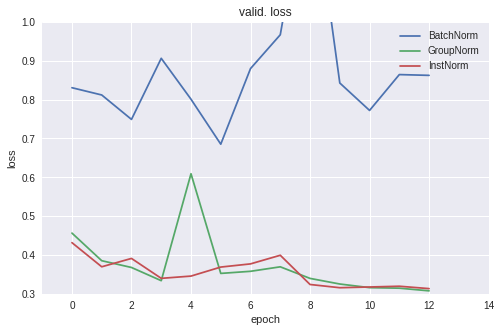

In [30]:
plot_history(hists, attribute='val_loss', axis=(-1,14,0.3,1.), loc='upper right')

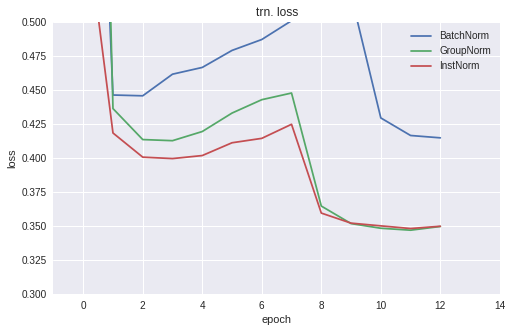

In [31]:
plot_history(hists, attribute='loss', axis=(-1,14,0.3,0.5), loc='upper right')

# Extra experiments on group normalization

### Setup1: AMSGrad
- Optimizer: Adam(**amsgrad=True**)
- Batch size: 1
- Epochs: 13

### Setup2: Normal batch size w/ AMSGrad
- Optimizer: Adam(**amsgrad=True**)
- Batch size: **128**
- Epochs: **39**

In [0]:
# input image dimensions
img_rows, img_cols = 28, 28

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(w_l2), input_shape=input_shape))
model.add(GroupNormalization(group=8))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(w_l2)))
model.add(GroupNormalization(group=8))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(amsgrad=True),
              metrics=['accuracy'])

In [33]:
hist3=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), callbacks=[reduce_lr])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/13
 2708/60000 [>.............................] - ETA: 13:38 - loss: 1.8386 - acc: 0.459059999/60000 [============================>.] - ETA: 0s - loss: 0.6905 - acc: 0.749960000/60000 [==============================] - 875s 15ms/step - loss: 0.6906 - acc: 0.7499 - val_loss: 0.3652 - val_acc: 0.8724
Epoch 2/13
 1767/60000 [..............................] - ETA: 13:44 - loss: 0.4206 - acc: 0.848359997/60000 [============================>.] - ETA: 0s - loss: 0.4199 - acc: 0.850860000/60000 [==============================] - 871s 15ms/step - loss: 0.4199 - acc: 0.8508 - val_loss: 0.3237 - val_acc: 0.8915
Epoch 3/13
 1770/60000 [..............................] - ETA: 13:33 - loss: 0.3784 - acc: 0.883159996/60000 [============================>.] - ETA: 0s - loss: 0.3505 - acc: 0.877460000/60000 [==============================] - 862s 14ms/step - loss: 0.3505 - acc: 0.8774 - val_loss: 0.2874 - val_acc: 0.8998
Epoch 4/13
 1769/60000 [..

In [0]:
# input image dimensions
img_rows, img_cols = 28, 28

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(w_l2), input_shape=input_shape))
model.add(GroupNormalization(group=8))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(w_l2)))
model.add(GroupNormalization(group=8))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(amsgrad=True),
              metrics=['accuracy'])

In [35]:
hist4=model.fit(x_train, y_train,
          batch_size=128,
          epochs=epochs*3,
          verbose=1,
          validation_data=(x_test, y_test), callbacks=[reduce_lr])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/39
60000/60000 [==============================] - 27s 445us/step - loss: 0.6903 - acc: 0.7523 - val_loss: 0.3747 - val_acc: 0.8679
Epoch 2/39
14592/60000 [======>.......................] - ETA: 18s - loss: 0.4969 - acc: 0.816060000/60000 [==============================] - 26s 434us/step - loss: 0.4736 - acc: 0.8249 - val_loss: 0.3353 - val_acc: 0.8810
Epoch 3/39
40320/60000 [===================>..........] - ETA: 8s - loss: 0.4128 - acc: 0.846860000/60000 [==============================] - 26s 433us/step - loss: 0.4050 - acc: 0.8499 - val_loss: 0.2859 - val_acc: 0.8968
Epoch 4/39
50048/60000 [========================>.....] - ETA: 4s - loss: 0.3636 - acc: 0.865060000/60000 [==============================] - 26s 434us/step - loss: 0.3637 - acc: 0.8652 - val_loss: 0.2718 - val_acc: 0.9035
Epoch 5/39
53888/60000 [=========================>....] - ETA: 2s - loss: 0.3339 - acc: 0.876560000/60000 [==============================] - 26s

55424/60000 [==========================>...] - ETA: 1s - loss: 0.1481 - acc: 0.944460000/60000 [==============================] - 26s 433us/step - loss: 0.1479 - acc: 0.9444 - val_loss: 0.2225 - val_acc: 0.9271
Epoch 39/39
55424/60000 [==========================>...] - ETA: 1s - loss: 0.1478 - acc: 0.944260000/60000 [==============================] - 26s 433us/step - loss: 0.1479 - acc: 0.9441 - val_loss: 0.2231 - val_acc: 0.9270
Test loss: 0.22305477841496468
Test accuracy: 0.927


In [0]:
hists = [hist0, hist1, hist2, hist3, hist4]

## Visualization

##### (Figures missing legends of above 2 AMSGrad experiments)

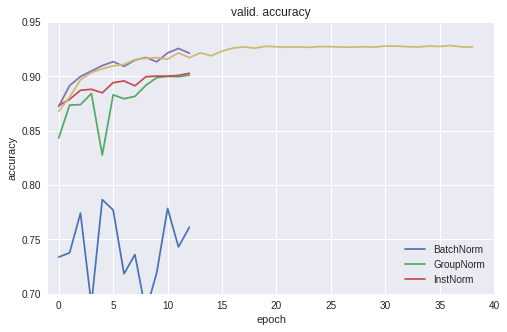

In [37]:
plot_history(hists, attribute='val_acc', axis=(-1,40,0.7,0.95), loc='lower right')

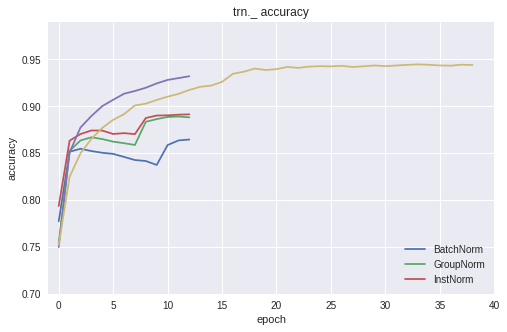

In [38]:
plot_history(hists, attribute='acc', axis=(-1,40,0.7,0.99), loc='lower right')

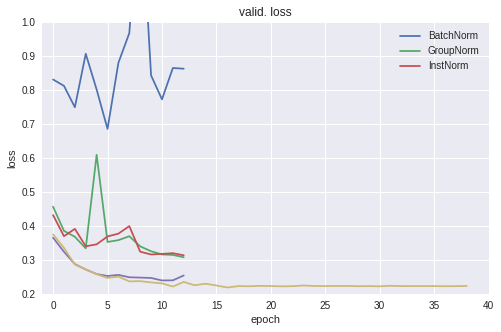

In [39]:
plot_history(hists, attribute='val_loss', axis=(-1,40,0.2,1.), loc='upper right')

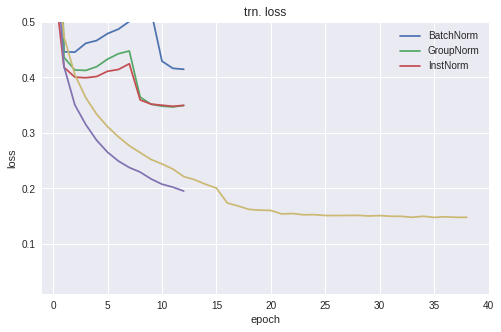

In [40]:
plot_history(hists, attribute='loss', axis=(-1,40, 0.01,0.5), loc='upper right')

##### Correct legend is shown below

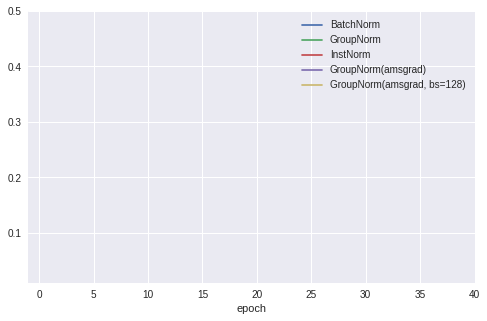

In [12]:
axis=(-1,40, 0.01,0.5)
loc='upper right'
plt.figure(figsize=(8, 5))  
plt.axis(axis)


for i in range(5):
  plt.plot([0])
plt.xlabel('epoch')  
plt.legend(['BatchNorm', 'GroupNorm', 'InstNorm', 'GroupNorm(amsgrad)', 'GroupNorm(amsgrad, bs=128)'], loc=loc)  